# Simple Tokenization Demonstration

**Standalone notebook** - No data dependencies required!

This notebook demonstrates:
1. Basic text tokenization
2. Word and sentence tokenization
3. Text preprocessing
4. Token analysis

In [1]:
# Install NLTK if needed
# !pip install nltk

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data (including punkt_tab for newer NLTK versions)
print("Downloading NLTK data...")
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)  # Required for newer NLTK versions
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

print("✓ Setup complete")

✓ Setup complete


## 1. Sample Financial Headlines

In [2]:
# Sample financial news headlines
headlines = [
    "Apple Stock Rises on Strong iPhone Sales and Positive Earnings Report",
    "Tech Giant Microsoft Announces Major AI Investment",
    "NVIDIA Stock Surges After Beating Quarterly Expectations",
    "Market Volatility Increases Amid Economic Uncertainty",
    "Tesla Shares Drop Following Production Concerns"
]

print("Sample Headlines:")
for i, headline in enumerate(headlines, 1):
    print(f"{i}. {headline}")

Sample Headlines:
1. Apple Stock Rises on Strong iPhone Sales and Positive Earnings Report
2. Tech Giant Microsoft Announces Major AI Investment
3. NVIDIA Stock Surges After Beating Quarterly Expectations
4. Market Volatility Increases Amid Economic Uncertainty
5. Tesla Shares Drop Following Production Concerns


## 2. Basic Word Tokenization

In [3]:
print("="*80)
print("WORD TOKENIZATION")
print("="*80)

for i, headline in enumerate(headlines, 1):
    print(f"\n{i}. Original:")
    print(f"   {headline}")
    
    # Tokenize into words
    tokens = word_tokenize(headline)
    print(f"\n   Tokens ({len(tokens)} total):")
    print(f"   {tokens}")

WORD TOKENIZATION

1. Original:
   Apple Stock Rises on Strong iPhone Sales and Positive Earnings Report

   Tokens (11 total):
   ['Apple', 'Stock', 'Rises', 'on', 'Strong', 'iPhone', 'Sales', 'and', 'Positive', 'Earnings', 'Report']

2. Original:
   Tech Giant Microsoft Announces Major AI Investment

   Tokens (7 total):
   ['Tech', 'Giant', 'Microsoft', 'Announces', 'Major', 'AI', 'Investment']

3. Original:
   NVIDIA Stock Surges After Beating Quarterly Expectations

   Tokens (7 total):
   ['NVIDIA', 'Stock', 'Surges', 'After', 'Beating', 'Quarterly', 'Expectations']

4. Original:
   Market Volatility Increases Amid Economic Uncertainty

   Tokens (6 total):
   ['Market', 'Volatility', 'Increases', 'Amid', 'Economic', 'Uncertainty']

5. Original:
   Tesla Shares Drop Following Production Concerns

   Tokens (6 total):
   ['Tesla', 'Shares', 'Drop', 'Following', 'Production', 'Concerns']


## 3. Sentence Tokenization

In [4]:
# Example with multiple sentences
text = """Apple reported strong earnings. The company's revenue exceeded expectations. 
Investors are optimistic about future growth. Stock prices rose 5% in after-hours trading."""

print("Original Text:")
print(text)
print("\n" + "="*80)
print("SENTENCE TOKENIZATION")
print("="*80)

sentences = sent_tokenize(text)
for i, sentence in enumerate(sentences, 1):
    print(f"\nSentence {i}: {sentence}")

Original Text:
Apple reported strong earnings. The company's revenue exceeded expectations. 
Investors are optimistic about future growth. Stock prices rose 5% in after-hours trading.

SENTENCE TOKENIZATION

Sentence 1: Apple reported strong earnings.

Sentence 2: The company's revenue exceeded expectations.

Sentence 3: Investors are optimistic about future growth.

Sentence 4: Stock prices rose 5% in after-hours trading.


## 4. Advanced Preprocessing

In [5]:
def preprocess_text(text):
    """
    Advanced text preprocessing:
    1. Tokenize
    2. Convert to lowercase
    3. Remove stopwords
    4. Remove punctuation
    5. Lemmatize
    """
    # Tokenize
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    
    # Lemmatize (reduce words to base form)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    
    return tokens

print("="*80)
print("ADVANCED PREPROCESSING")
print("="*80)

for i, headline in enumerate(headlines, 1):
    print(f"\n{i}. Original:")
    print(f"   {headline}")
    
    # Basic tokenization
    basic_tokens = word_tokenize(headline)
    print(f"\n   Basic tokens ({len(basic_tokens)}):")
    print(f"   {basic_tokens}")
    
    # Processed tokens
    processed_tokens = preprocess_text(headline)
    print(f"\n   Processed tokens ({len(processed_tokens)}):")
    print(f"   {processed_tokens}")
    
    reduction = (1 - len(processed_tokens) / len(basic_tokens)) * 100
    print(f"\n   Token reduction: {reduction:.1f}%")

ADVANCED PREPROCESSING

1. Original:
   Apple Stock Rises on Strong iPhone Sales and Positive Earnings Report

   Basic tokens (11):
   ['Apple', 'Stock', 'Rises', 'on', 'Strong', 'iPhone', 'Sales', 'and', 'Positive', 'Earnings', 'Report']

   Processed tokens (9):
   ['apple', 'stock', 'rise', 'strong', 'iphone', 'sale', 'positive', 'earnings', 'report']

   Token reduction: 18.2%

2. Original:
   Tech Giant Microsoft Announces Major AI Investment

   Basic tokens (7):
   ['Tech', 'Giant', 'Microsoft', 'Announces', 'Major', 'AI', 'Investment']

   Processed tokens (7):
   ['tech', 'giant', 'microsoft', 'announces', 'major', 'ai', 'investment']

   Token reduction: 0.0%

3. Original:
   NVIDIA Stock Surges After Beating Quarterly Expectations

   Basic tokens (7):
   ['NVIDIA', 'Stock', 'Surges', 'After', 'Beating', 'Quarterly', 'Expectations']

   Processed tokens (6):
   ['nvidia', 'stock', 'surge', 'beating', 'quarterly', 'expectation']

   Token reduction: 14.3%

4. Original:
   Ma

## 5. Token Statistics

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Analyze all headlines
data = []
for headline in headlines:
    basic = word_tokenize(headline)
    processed = preprocess_text(headline)
    data.append({
        'headline': headline,
        'basic_count': len(basic),
        'processed_count': len(processed),
        'reduction_pct': (1 - len(processed) / len(basic)) * 100
    })

df = pd.DataFrame(data)

print("\n" + "="*80)
print("TOKEN STATISTICS")
print("="*80)
print(f"\nAverage basic tokens: {df['basic_count'].mean():.2f}")
print(f"Average processed tokens: {df['processed_count'].mean():.2f}")
print(f"Average reduction: {df['reduction_pct'].mean():.1f}%")

print("\nDetailed Statistics:")
print(df[['basic_count', 'processed_count', 'reduction_pct']].describe())


TOKEN STATISTICS

Average basic tokens: 7.40
Average processed tokens: 6.80
Average reduction: 6.5%

Detailed Statistics:
       basic_count  processed_count  reduction_pct
count     5.000000          5.00000       5.000000
mean      7.400000          6.80000       6.493506
std       2.073644          1.30384       8.997667
min       6.000000          6.00000       0.000000
25%       6.000000          6.00000       0.000000
50%       7.000000          6.00000       0.000000
75%       7.000000          7.00000      14.285714
max      11.000000          9.00000      18.181818


## 6. Visualization

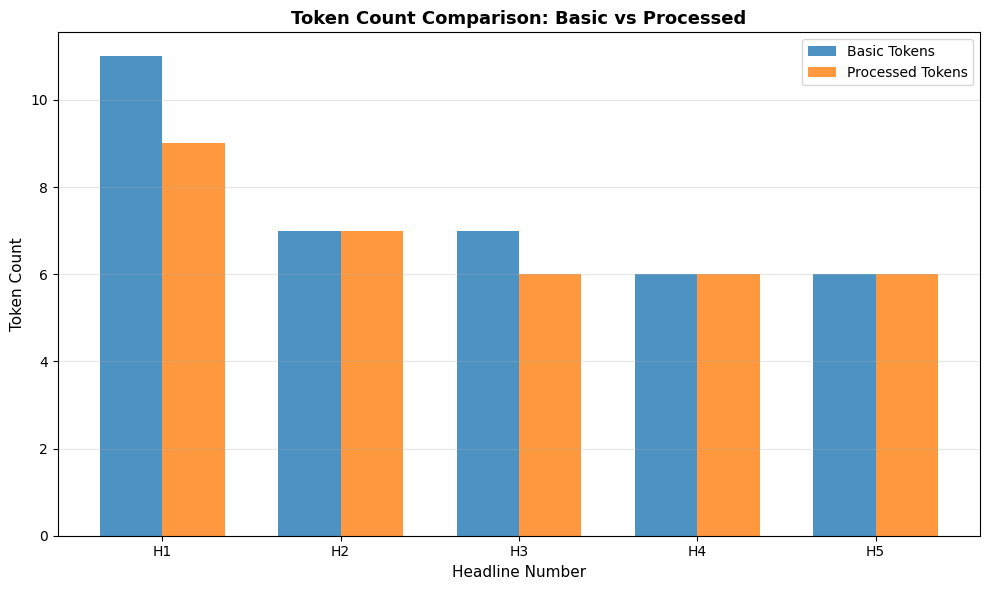

In [7]:
# Visualize token counts
fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(headlines))
width = 0.35

ax.bar([i - width/2 for i in x], df['basic_count'], width, label='Basic Tokens', alpha=0.8)
ax.bar([i + width/2 for i in x], df['processed_count'], width, label='Processed Tokens', alpha=0.8)

ax.set_xlabel('Headline Number', fontsize=11)
ax.set_ylabel('Token Count', fontsize=11)
ax.set_title('Token Count Comparison: Basic vs Processed', fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([f'H{i+1}' for i in x])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 7. Stopwords Analysis

In [8]:
# Show which words were removed
print("="*80)
print("STOPWORDS REMOVED")
print("="*80)

stop_words = set(stopwords.words('english'))

for i, headline in enumerate(headlines[:3], 1):  # Show first 3
    print(f"\n{i}. {headline}")
    
    tokens = word_tokenize(headline.lower())
    removed = [t for t in tokens if t in stop_words]
    kept = [t for t in tokens if t.isalpha() and t not in stop_words]
    
    print(f"   Removed: {removed}")
    print(f"   Kept: {kept}")

STOPWORDS REMOVED

1. Apple Stock Rises on Strong iPhone Sales and Positive Earnings Report
   Removed: ['on', 'and']
   Kept: ['apple', 'stock', 'rises', 'strong', 'iphone', 'sales', 'positive', 'earnings', 'report']

2. Tech Giant Microsoft Announces Major AI Investment
   Removed: []
   Kept: ['tech', 'giant', 'microsoft', 'announces', 'major', 'ai', 'investment']

3. NVIDIA Stock Surges After Beating Quarterly Expectations
   Removed: ['after']
   Kept: ['nvidia', 'stock', 'surges', 'beating', 'quarterly', 'expectations']


## 8. Summary

In [ ]:
print("\n" + "="*80)
print("TOKENIZATION SUMMARY")
print("="*80)

print(f"\n✓ Processed {len(headlines)} headlines")
print(f"\n✓ Tokenization Methods Demonstrated:")
print("  - Word tokenization")
print("  - Sentence tokenization")
print("  - Stopword removal")
print("  - Lemmatization")

print(f"\n✓ Results:")
print(f"  - Average tokens per headline: {df['basic_count'].mean():.1f}")
print(f"  - After preprocessing: {df['processed_count'].mean():.1f}")
print(f"  - Token reduction: {df['reduction_pct'].mean():.1f}%")

print("\n✓ Key Takeaways:")
print("  - Tokenization breaks text into analyzable units")
print("  - Preprocessing reduces noise and focuses on meaningful words")
print("  - Stopword removal eliminates common words (the, and, is, etc.)")
print("  - Lemmatization reduces words to their base form")

print("\n" + "="*80)


TOKENIZATION SUMMARY

✓ Processed 5 headlines

✓ Tokenization Methods Demonstrated:
  - Word tokenization
  - Sentence tokenization
  - Stopword removal
  - Lemmatization

✓ Results:
  - Average tokens per headline: 7.4
  - After preprocessing: 6.8
  - Token reduction: 6.5%

✓ Key Takeaways:
  - Tokenization breaks text into analyzable units
  - Preprocessing reduces noise and focuses on meaningful words
  - Stopword removal eliminates common words (the, and, is, etc.)
  - Lemmatization reduces words to their base form



: 

## Conclusion

This notebook demonstrated:
- ✅ **Word tokenization** - Breaking text into individual words
- ✅ **Sentence tokenization** - Breaking text into sentences
- ✅ **Stopword removal** - Removing common words
- ✅ **Lemmatization** - Reducing words to base form
- ✅ **Token analysis** - Statistics and visualization

**Next Steps:**
- Apply tokenization to larger datasets
- Use tokens for sentiment analysis
- Build vocabulary for ML models
- Extract features from tokens